# KA User Survey Analysis
_Ravi Dayabhai_ (**@ravi**)

In [576]:
# Import dependencies
import datetime as dt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Show all columns
pd.set_option('display.max_columns', None)

## Entrance Survey
According to TomP:
>About 3 years ago I started a quick survey showing to a small % of users, asking how they heard about KA. It was useful data for marketing efforts at the time. We decided to keep it running, assuming the mix changed throughout the school year, and over time in general.
>
>I've attached the raw results of the survey. (It hasn't always run consistently, but it doesn't change that much over time. I noticed someone had turned it off at some point in the last 12 months, so I restarted it recently to have up-to-date results). 

First, getting a sense of the data.

In [577]:
# Open files
rolling_entrance = pd.read_csv("KA Entrance Survey Rolling (June 2017).csv", low_memory=False, index_col=None)

# Check column types
rolling_entrance.dtypes

Response ID                                                                                     int64  
Date                                                                                            object 
Identity                                                                                        object 
IP Address                                                                                      object 
Page                                                                                            object 
Referrer                                                                                        float64
User Agent                                                                                      object 
bibliotron_new_design                                                                           object 
window_width                                                                                    float64
window_height                                                   

In [578]:
rolling_entrance.shape

(92741, 26)

Making sure the primary key consists of unique values.

In [579]:
if len(rolling_entrance["Response ID"]) == len(rolling_entrance["Response ID"].unique()):
    print("All values in column are unique!")
else:
    print("There are duplicate or missing data in column.")

All values in column are unique!


Then, checking the nulls in each column.

In [580]:
rolling_entrance.isnull().sum()

Response ID                                                                                     0    
Date                                                                                            0    
Identity                                                                                        0    
IP Address                                                                                      0    
Page                                                                                            0    
Referrer                                                                                        92741
User Agent                                                                                      0    
bibliotron_new_design                                                                           67284
window_width                                                                                    67206
window_height                                                                     

In [581]:
cols_of_interest = ["Q1: Would you tell a friend to use Khan Academy?", "Q2: I am a ....", "Q3: Last question! Are you using Khan Academy because a teacher/tutor is assigning you work?"]
rolling_entrance[cols_of_interest].isnull().all(axis=1).sum()

0

From above it's clear that there are no rows where the responses to all of the survey questions are null. I'm a little confused how 140 rows don't have a response for "Q1." Given that this is the primary question we're interested in, any responses with null values for this question are dropped.

In [582]:
rolling_entrance = rolling_entrance[rolling_entrance["Q1: Would you tell a friend to use Khan Academy?"].notnull()]
rolling_entrance.shape

(92601, 26)

Next, converting the "Date" column to a DateTime type.

In [583]:
# Ignore 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

rolling_entrance.loc[:,"Date"] = pd.to_datetime(rolling_entrance["Date"])
rolling_entrance.dtypes

Response ID                                                                                     int64         
Date                                                                                            datetime64[ns]
Identity                                                                                        object        
IP Address                                                                                      object        
Page                                                                                            object        
Referrer                                                                                        float64       
User Agent                                                                                      object        
bibliotron_new_design                                                                           object        
window_width                                                                                    float64       
w

Looking at the range of dates.

In [584]:
rolling_entrance.Date.describe()

count     92601              
unique    91510              
top       2017-04-28 15:49:52
freq      4                  
first     2016-02-09 18:50:28
last      2017-06-13 08:53:42
Name: Date, dtype: object

Determining distribution of responses by month in the date range.

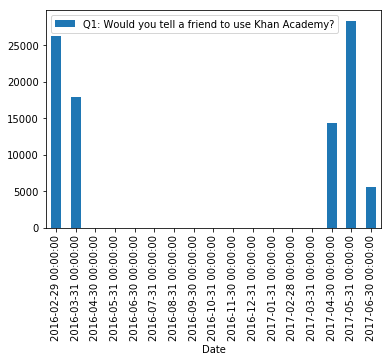

In [585]:
# Count responses per month
rolling_entrance.reset_index("Date", inplace=True)
date_df = rolling_entrance.set_index("Date")
date_responses_data = date_df[["Q1: Would you tell a friend to use Khan Academy?"]].groupby(pd.TimeGrouper(freq='M')).count()

# Plot histogram of responses
date_responses_data.plot.bar()

In [586]:
date_responses_data

Q1: Would you tell a friend to use Khan Academy?
Date                                                        
2016-02-29  26333                                           
2016-03-31  17957                                           
2016-04-30  1                                               
2016-05-31  0                                               
2016-06-30  0                                               
2016-07-31  0                                               
2016-08-31  0                                               
2016-09-30  0                                               
2016-10-31  0                                               
2016-11-30  0                                               
2016-12-31  0                                               
2017-01-31  0                                               
2017-02-28  0                                               
2017-03-31  0                                               
2017-04-30  14319                                           
2017-05-31  28414                                           
2017-06-30  5577

Looks like we figured out when this was turned off! Checking to see that IP addresses are unique (i.e., we don't have multiple responses from the same IP address).

In [587]:
set(rolling_entrance["IP Address"]) == rolling_entrance.shape[0]

False

In [588]:
# Duplicate IPs
duplicate_IP = rolling_entrance[rolling_entrance["IP Address"].duplicated(keep=False)].sort_values(["IP Address"])
duplicate_IP_display = duplicate_IP.groupby(["IP Address"]).count().loc[:,["Response ID", "Q1: Would you tell a friend to use Khan Academy?"]].rename(columns={"Response ID": "# of Responses", "Q1: Would you tell a friend to use Khan Academy?": "# answered Q1"})
duplicate_IP_display

# of Responses  # answered Q1
IP Address                                    
1.179.181.178    2               2            
1.240.0.117      14              14           
100.0.207.66     2               2            
100.1.18.214     2               2            
100.12.169.66    5               5            
100.32.137.123   2               2            
100.33.235.229   6               6            
100.35.38.10     2               2            
100.36.204.94    2               2            
100.36.90.126    2               2            
100.37.6.98      2               2            
100.43.108.91    2               2            
100.43.195.98    2               2            
100.8.152.94     2               2            
101.127.80.235   2               2            
101.167.14.209   2               2            
101.178.137.104  3               3            
101.181.91.72    2               2            
103.20.168.98    5               5            
103.205.134.28   2               2            
103.21.125.81    4               4            
103.215.2.12     3               3            
103.225.100.51   4               4            
103.225.4.184    2               2            
103.226.161.122  2               2            
103.227.98.121   2               2            
103.231.217.30   2               2            
103.238.195.242  2               2            
103.24.208.241   2               2            
103.24.208.244   2               2            
103.24.208.245   2               2            
103.240.207.86   2               2            
103.249.206.35   2               2            
103.253.45.118   2               2            
103.255.170.2    2               2            
103.27.204.27    2               2            
103.27.8.42      2               2            
103.55.49.230    2               2            
103.55.58.3      2               2            
104.1.137.222    2               2            
104.10.52.79     3               3            
104.129.196.110  2               2            
104.129.198.110  2               2            
104.129.198.116  2               2            
104.129.198.69   2               2            
104.129.198.71   6               6            
104.129.198.76   3               3            
104.129.198.86   3               3            
104.129.204.55   2               2            
104.129.204.85   4               4            
104.129.72.126   2               2            
104.131.66.8     3               3            
104.131.75.86    2               2            
104.149.1.90     3               3            
104.15.1.102     2               2            
104.153.224.196  2               2            
104.153.242.70   2               2            
104.160.63.194   2               2            
104.169.16.218   2               2            
104.179.190.74   2               2            
104.179.243.159  2               2            
104.192.62.26    2               2            
104.192.8.108    2               2            
104.192.8.111    2               2            
104.192.8.114    2               2            
104.192.8.119    2               2            
104.192.9.1      2               2            
104.192.9.10     3               3            
104.192.9.102    2               2            
104.192.9.107    2               2            
104.192.9.11     4               4            
104.192.9.113    2               2            
104.192.9.13     4               4            
104.192.9.14     3               3            
104.192.9.16     2               2            
104.192.9.18     2               2            
104.192.9.22     2               2            
104.192.9.23     2               2            
104.192.9.24     3               3            
104.192.9.26     3               3            
104.192.9.27     2               2            
104.192.9.28     2               2            
104.192.9.29     2               2            
104.192.9.3      2    

So, there are **8602 IP addresses that have submitted a response more than once**. Checking below to see if there are any duplicates for "Date - IP Address" pairs. The following looks at a couple of the outliers from these duplicates.

In [589]:
funky_IP = duplicate_IP[duplicate_IP["IP Address"] == "1.240.0.117"]
funky_IP.iloc[:,23:]

Q1: Would you tell a friend to use Khan Academy?  Q2: I am a ....  \
58736  No                                               Teacher           
58710  Yes!                                             Learner/student   
58711  No                                               Learner/student   
58712  No                                               Teacher           
58713  No                                               Teacher           
58718  No                                               Teacher           
58739  No                                               Teacher           
58709  No                                               Teacher           
58735  Yes!                                             Learner/student   
58704  No                                               Teacher           
58733  Yes!                                             Learner/student   
58731  Maybe / not sure                                 Teacher           
58728  No                                               Teacher           
58721  Yes!                                             Learner/student   

      Q3: Last question! Are you using Khan Academy because a teacher/tutor is assigning you work?  \
58736  NaN                                                                                           
58710  No                                                                                            
58711  No                                                                                            
58712  NaN                                                                                           
58713  NaN                                                                                           
58718  NaN                                                                                           
58739  NaN                                                                                           
58709  NaN                                                                                           
58735  No                                                                                            
58704  NaN                                                                                           
58733  No                                                                                            
58731  NaN                                                                                           
58728  NaN                                                                                           
58721  No                                                                                            

      Q3. Other explain  
58736  NaN               
58710  NaN               
58711  NaN               
58712  NaN               
58713  NaN               
58718  NaN               
58739  NaN               
58709  NaN               
58735  NaN               
58704  NaN               
58733  NaN               
58731  NaN               
58728  NaN               
58721  NaN

In [590]:
rolling_entrance[rolling_entrance.duplicated(subset=["Date", "IP Address"], keep=False)]

index  Response ID                Date  \
29697  29750  75571785    2016-03-03 14:25:45   
29760  29813  75573854    2016-03-03 14:25:45   

                                                         Identity  \
29697  _gae_bingo_random:GUAqmAw-3odcVYbWCJfCQN02_hr1Si6hVl9Ss5R6   
29760  _gae_bingo_random:EcirqdVCEicfyMeUIC74PV_wqUPP6Cs6pd46v4BL   

           IP Address  \
29697  98.100.200.205   
29760  98.100.200.205   

                                                                                Page  \
29697  https://www.khanacademy.org/mission/cc-sixth-grade-math/task/5435783873953792   
29760  https://www.khanacademy.org/mission/cc-fifth-grade-math/task/4921177958252544   

       Referrer  \
29697 NaN         
29760 NaN         

                                                                                                               User Agent  \
29697  Mozilla/5.0 (X11; CrOS armv7l 7647.84.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36   
29760  Mozilla/5.0 (X11; CrOS armv7l 7647.84.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36   

      bibliotron_new_design  window_width  window_height  \
29697  NaN                  NaN           NaN              
29760  NaN                  NaN           NaN              

      eligible_for_nps_survey eligible_for_sat_intent_survey_1  \
29697  False                   False                             
29760  False                   False                             

      eligible_for_sat_satisfaction_survey  \
29697  False                                 
29760  False                                 

      eligible_for_unregistered_user_goal_survey  \
29697  False                                       
29760  False                                       

      eligible_for_sat_intent_survey_2  \
29697  False                             
29760  False                             

      eligible_for_registered_user_goal_survey view_project_failure  \
29697  NaN                                      NaN                   
29760  NaN                                      NaN                   

      bibliotron_homepage article_satisfaction_survey view_project_completed  \
29697  NaN                 NaN                         NaN                     
29760  NaN                 NaN                         NaN                     

      submitted_project submitted_project_eval  \
29697  NaN               NaN                     
29760  NaN               NaN                     

      Q1: Would you tell a friend to use Khan Academy?  Q2: I am a ....  \
29697  Yes!                                             Learner/student   
29760  Maybe / not sure                                 Learner/student   

      Q3: Last question! Are you using Khan Academy because a teacher/tutor is assigning you work?  \
29697  Yes ,No                                                                                       
29760  Yes                                                                                           

      Q3. Other explain  
29697  NaN               
29760  NaN

This is sort of weird. We have a 2 responses by the _exact same IP address_ at the _exact same time_ with different answers to the survey questions.

Note: the following NPS calculations

### NPS Scores

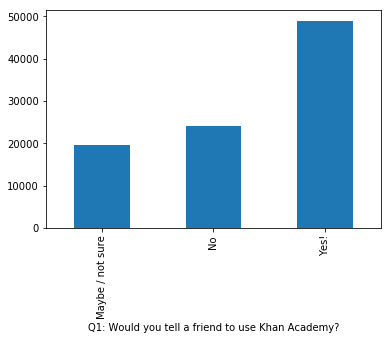

In [591]:
# Create Q1 Series
Q1_dist = rolling_entrance.groupby(["Q1: Would you tell a friend to use Khan Academy?"]).count()["Response ID"]

# Plot distribution of responses to Q1
Q1_dist.plot.bar()

#### NPS (Overall)

Below constructs the NPS breakdown by user type for the entirety of the dataset.

In [592]:
# Creates NPS value field mapped to each response to Q1
mapping = {'Maybe / not sure': 0, 'No': -1, 'Yes!': 1}
rolling_entrance["NPS_vals"] = rolling_entrance["Q1: Would you tell a friend to use Khan Academy?"].apply(lambda x: mapping[x] * 100)

# Check NPS value field for nulls
rolling_entrance["NPS_vals"].isnull().sum()

0

In [593]:
rolling_entrance[["NPS_vals","Q1: Would you tell a friend to use Khan Academy?"]].isnull().any(axis=0)

NPS_vals                                            False
Q1: Would you tell a friend to use Khan Academy?    False
dtype: bool

In [594]:
# Groups the NPS scores by respondent type
NPS_results_all = rolling_entrance.groupby(["Q2: I am a ...."]).agg({"Response ID": 'size', "NPS_vals": 'mean'}).rename(columns={"Response ID": '# of Responses','NPS_vals': 'NPS'}).reset_index()
NPS_results_all.sort_values("NPS", ascending=False)

Q2: I am a ....  # of Responses        NPS
2  Parent ,Learner/student           232             70.258621
4  Teacher ,Learner/student          165             63.030303
5  Teacher ,Parent                   72              36.111111
0  Learner/student                   64296           35.283688
1  Parent                            2982            25.050302
3  Teacher                           4245            17.926973
6  Teacher ,Parent ,Learner/student  291             6.872852

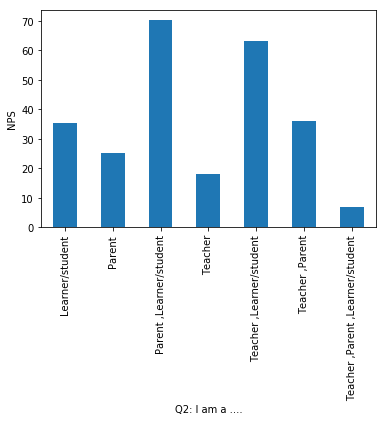

In [595]:
NPS_results_all.set_index(["Q2: I am a ...."]).NPS.plot.bar().set_ylabel("NPS")

#### NPS (per Wave)

Performing the same analysis, but dividing the time series into two distinct groups (responses before May 2016 and after March 2017).

In [596]:
# Set cut-off date: May 1, 2016
cut_off = dt.datetime(2016, 5, 1)

# Divide the data
wave_1 = rolling_entrance[rolling_entrance["Date"] < cut_off]
wave_2 = rolling_entrance[rolling_entrance["Date"] > cut_off]

# Do NPS grouping by respondent type
NPS_results_wave_1 = wave_1.groupby(["Q2: I am a ...."]).agg({"Response ID": 'size', "NPS_vals": 'mean'}).rename(columns={"Response ID": '# of Responses','NPS_vals': 'NPS'}).reset_index()
NPS_results_wave_2 = wave_2.groupby(["Q2: I am a ...."]).agg({"Response ID": 'size', "NPS_vals": 'mean'}).rename(columns={"Response ID": '# of Responses','NPS_vals': 'NPS'}).reset_index()

Wave 1:

In [597]:
NPS_results_wave_1.sort_values("NPS", ascending=False)

Q2: I am a ....  # of Responses        NPS
2  Parent ,Learner/student           232             70.258621
4  Teacher ,Learner/student          165             63.030303
1  Parent                            904             41.371681
0  Learner/student                   26376           39.653473
5  Teacher ,Parent                   72              36.111111
3  Teacher                           1452            27.548209
6  Teacher ,Parent ,Learner/student  291             6.872852

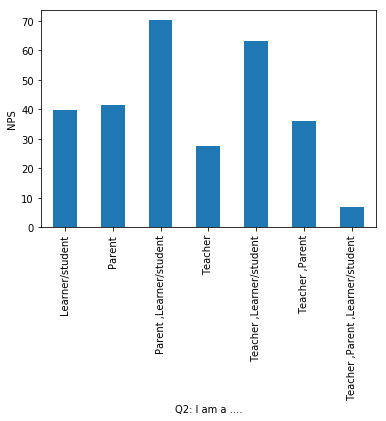

In [598]:
NPS_results_wave_1.set_index(["Q2: I am a ...."]).NPS.plot.bar().set_ylabel("NPS")

Wave 2:

In [599]:
NPS_results_wave_2.sort_values("NPS", ascending=False)

Q2: I am a ....  # of Responses        NPS
0  Learner/student  37920           32.244198
1  Parent           2078            17.949952
2  Teacher          2793            12.925170

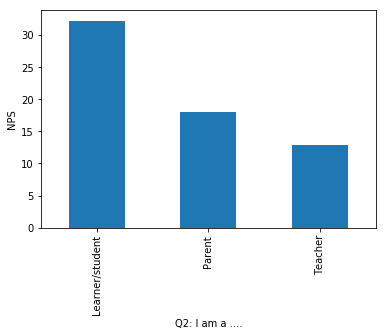

In [600]:
NPS_results_wave_2.set_index(["Q2: I am a ...."]).NPS.plot.bar().set_ylabel("NPS")

#### NPS (by Strict Category)
Here I'm ignoring responses that are compound type (i.e., only looking at responses that are "Parent", "Teacher", xor "Learner/student").

In [601]:
# Filters respondent type strictly
strict_cond = rolling_entrance["Q2: I am a ...."].isin(["Parent", "Teacher", "Learner/student"])

# Groups the NPS scores by respondent type
NPS_results_strict = rolling_entrance[strict_cond].groupby(["Q2: I am a ...."]).agg({"Response ID": 'size', "NPS_vals": 'mean'}).rename(columns={"Response ID": '# of Responses','NPS_vals': 'NPS'}).reset_index()
NPS_results_strict.sort_values("NPS", ascending=False)

Q2: I am a ....  # of Responses        NPS
0  Learner/student  64296           35.283688
1  Parent           2982            25.050302
2  Teacher          4245            17.926973

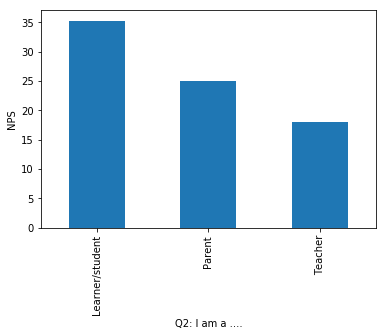

In [604]:
NPS_results_strict.set_index(["Q2: I am a ...."]).NPS.plot.bar().set_ylabel("NPS")

### NPS Commentary

See below for **all of the commentary** provided by survey respondents.

In [602]:
# Show strings in full and show all rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

# Select respondent type, response, and NPS value
commentary_condition = rolling_entrance["Q3. Other explain"].notnull()
rolling_entrance[commentary_condition].loc[:,["Q2: I am a ....", "Q3. Other explain", "Q1: Would you tell a friend to use Khan Academy?"]]

Q2: I am a ....  \
44305  Learner/student   
44315  Learner/student   
44353  Learner/student   
44363  Learner/student   
44369  Learner/student   
44424  Learner/student   
44446  Learner/student   
44583  Learner/student   
44585  Learner/student   
44591  Learner/student   
44598  Learner/student   
44604  Learner/student   
44627  Learner/student   
44649  Learner/student   
44687  Learner/student   
44693  Learner/student   
44763  Learner/student   
44766  Learner/student   
44795  Learner/student   
44801  Learner/student   
44856  Learner/student   
44864  Learner/student   
44913  Learner/student   
44985  Learner/student   
44998  Learner/student   
45002  Learner/student   
45006  Learner/student   
45020  Learner/student   
45043  Learner/student   
45082  Learner/student   
45093  Learner/student   
45100  Learner/student   
45159  Learner/student   
45212  Learner/student   
45225  Learner/student   
45256  Learner/student   
45270  Learner/student   
45423  Learner/student   
45428  Learner/student   
45488  Learner/student   
45572  Learner/student   
45582  Learner/student   
45596  Learner/student   
45653  Learner/student   
45670  Learner/student   
45742  Learner/student   
45809  Learner/student   
45916  Learner/student   
45983  Learner/student   
46093  Learner/student   
46147  Learner/student   
46150  Learner/student   
46202  Learner/student   
46207  Learner/student   
46217  Learner/student   
46224  Learner/student   
46245  Learner/student   
46260  Learner/student   
46308  Learner/student   
46442  Learner/student   
46550  Learner/student   
46551  Learner/student   
46554  Learner/student   
46582  Learner/student   
46617  Learner/student   
46642  Learner/student   
46681  Learner/student   
46723  Learner/student   
46737  Learner/student   
46771  Learner/student   
46776  Learner/student   
46804  Learner/student   
46835  Learner/student   
46930  Learner/student   
46934  Learner/student   
46966  Learner/student   
46984  Learner/student   
46985  Learner/student   
47006  Learner/student   
47023  Learner/student   
47024  Learner/student   
47068  Learner/student   
47106  Learner/student   
47110  Learner/student   
47116  Learner/student   
47121  Learner/student   
47125  Learner/student   
47134  Learner/student   
47168  Learner/student   
47170  Learner/student   
47233  Learner/student   
47260  Learner/student   
47293  Learner/student   
47302  Learner/student   
47325  Learner/student   
47382  Learner/student   
47383  Learner/student   
47412  Learner/student   
47413  Learner/student   
47449  Learner/student   
47455  Learner/student   
47472  Learner/student   
47482  Learner/student   
47498  Learner/student   
47518  Learner/student   
47539  Learner/student   
47556  Learner/student   
47564  Learner/student   
47640  Learner/student   
47642  Learner/student   
47654  Learner/student   
47682  Learner/student   
47690  Learner/student   
47696  Learner/student   
47708  Learner/student   
47720  Learner/student   
47742  Learner/student   
47770  Learner/student   
47792  Learner/student   
47860  Learner/student   
47863  Learner/student   
47906  Learner/student   
47954  Learner/student   
47974  Learner/student   
48010  Learner/student   
48011  Learner/student   
48026  Learner/student   
48027  Learner/student   
48031  Learner/student   
48125  Learner/student   
48176  Learner/student   
48195  Learner/student   
48211  Learner/student   
48225  Learner/student   
48312  Learner/student   
48328  Learner/student   
48363  Learner/student   
48387  Learner/student   
48422  Learner/student   
48460  Learner/student   
48597  Learner/student   
48650  Learner/student   
48703  Learner/student   
48720  Learner/student   
48760  Learner/student   
48798  Learner/student   
48850  Learner/student   
48949  Learner/student   
48963  Learner/student   
48987  Learner/student   
49068  Learner/student   
49110  Learner/student   
49157  Learner/student   
492

See below for **detractors commentary**.

In [603]:
detract_comment_cond = (rolling_entrance["Q3. Other explain"].notnull() & (rolling_entrance["NPS_vals"] < 0))
detractors = rolling_entrance[detract_comment_cond].loc[:,["Q2: I am a ....", "Q3. Other explain", "Q1: Would you tell a friend to use Khan Academy?"]]
detractors

Q2: I am a ....  \
45256  Learner/student   
45488  Learner/student   
45572  Learner/student   
45742  Learner/student   
45916  Learner/student   
46202  Learner/student   
46442  Learner/student   
46804  Learner/student   
46985  Learner/student   
47382  Learner/student   
48031  Learner/student   
48125  Learner/student   
48312  Learner/student   
48650  Learner/student   
48720  Learner/student   
48760  Learner/student   
49110  Learner/student   
49157  Learner/student   
49282  Learner/student   
49567  Learner/student   
49928  Learner/student   
49934  Learner/student   
49996  Learner/student   
50105  Learner/student   
50144  Learner/student   
50199  Learner/student   
50241  Learner/student   
50329  Learner/student   
50570  Learner/student   
51215  Learner/student   
51401  Learner/student   
51461  Learner/student   
51953  Learner/student   
52214  Learner/student   
52486  Learner/student   
52973  Learner/student   
53005  Learner/student   
53289  Learner/student   
53531  Learner/student   
53587  Learner/student   
53661  Learner/student   
53814  Learner/student   
54128  Learner/student   
54140  Learner/student   
54827  Learner/student   
55070  Learner/student   
55356  Learner/student   
55642  Learner/student   
55689  Learner/student   
55952  Learner/student   
55964  Learner/student   
55969  Learner/student   
56372  Learner/student   
56524  Learner/student   
56776  Learner/student   
57564  Learner/student   
57660  Learner/student   
57678  Learner/student   
57994  Learner/student   
58195  Learner/student   
58242  Learner/student   
58491  Learner/student   
58683  Learner/student   
58706  Learner/student   
59054  Learner/student   
59332  Learner/student   
59415  Learner/student   
59482  Learner/student   
60230  Learner/student   
60336  Learner/student   
60606  Learner/student   
60706  Learner/student   
61143  Learner/student   
61536  Learner/student   
61944  Learner/student   
62038  Learner/student   
62051  Learner/student   
62852  Learner/student   
63066  Learner/student   
63633  Learner/student   
63685  Learner/student   
63757  Learner/student   
63774  Learner/student   
63787  Learner/student   
64205  Learner/student   
64368  Learner/student   
64482  Learner/student   
64513  Learner/student   
64537  Learner/student   
64834  Learner/student   
64846  Learner/student   
64862  Learner/student   
65066  Learner/student   
65995  Learner/student   
66030  Learner/student   
66332  Learner/student   
66483  Learner/student   
66743  Learner/student   
67024  Learner/student   
67299  Learner/student   
67553  Learner/student   
68243  Learner/student   
68250  Learner/student   
68332  Learner/student   
68700  Learner/student   
68797  Learner/student   
68801  Learner/student   
68858  Learner/student   
68897  Learner/student   
68943  Learner/student   
69068  Learner/student   
69885  Learner/student   
69918  Learner/student   
69929  Learner/student   
70250  Learner/student   
70448  Learner/student   
70526  Learner/student   
71045  Learner/student   
71050  Learner/student   
71129  Learner/student   
71216  Learner/student   
71324  Learner/student   
71436  Learner/student   
71437  Learner/student   
71669  Learner/student   
71750  Learner/student   
72117  Learner/student   
72157  Learner/student   
72389  Learner/student   
72814  Learner/student   
73288  Learner/student   
73922  Learner/student   
73937  Learner/student   
73984  Learner/student   
73997  Learner/student   
74030  Learner/student   
74064  Learner/student   
74185  Learner/student   
74235  Learner/student   
74767  Learner/student   
75237  Learner/student   
75451  Learner/student   
75778  Learner/student   
76119  Learner/student   
76290  Learner/student   
76754  Learner/student   
77168  Learner/student   
77175  Learner/student   
77714  Learner/student   
77719  Learner/student   
77778  Learner/student   
77987  Learner/student   
78365  Learner/student   
785